In [30]:
import numpy as np
import torch
from torch.autograd import Variable
from torch import nn
import matplotlib.pyplot as plt

In [31]:
with open('logistic-data.txt', 'r') as f:
    data_list = f.readlines()
    data_list = [i.split('\n')[0] for i in data_list]
    data_list = [i.split(',') for i in data_list]
    data = [(float(i[0]), float(i[1]), float(i[2])) for i in data_list]
print(data)

[(34.62365962451697, 78.0246928153624, 0.0), (30.28671076822607, 43.89499752400101, 0.0), (35.84740876993872, 72.90219802708364, 0.0), (60.18259938620976, 86.30855209546826, 1.0), (79.0327360507101, 75.3443764369103, 1.0), (45.08327747668339, 56.3163717815305, 0.0), (61.10666453684766, 96.51142588489624, 1.0), (75.02474556738889, 46.55401354116538, 1.0), (76.09878670226257, 87.42056971926803, 1.0), (84.43281996120035, 43.53339331072109, 1.0), (95.86155507093572, 38.22527805795094, 0.0), (75.01365838958247, 30.60326323428011, 0.0), (82.30705337399482, 76.48196330235604, 1.0), (69.36458875970939, 97.71869196188608, 1.0), (39.53833914367223, 76.03681085115882, 0.0), (53.9710521485623, 89.20735013750205, 1.0), (69.07014406283025, 52.74046973016765, 1.0), (67.94685547711617, 46.67857410673128, 0.0), (70.66150955499435, 92.92713789364831, 1.0), (76.97878372747498, 47.57596364975532, 1.0), (67.37202754570876, 42.83843832029179, 0.0), (89.6767757507208, 65.79936592745237, 1.0), (50.53478828988

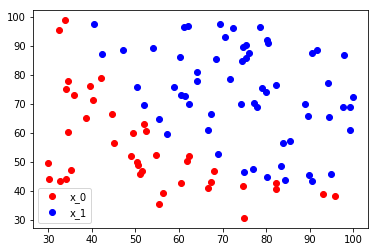

In [32]:
x0 = list(filter(lambda x: x[-1] == 0.0, data))
x1 = list(filter(lambda x: x[-1] == 1.0, data))
plot_x0_0 = [i[0] for i in x0]
plot_x0_1 = [i[1] for i in x0]
plot_x1_0 = [i[0] for i in x1]
plot_x1_1 = [i[1] for i in x1]
plt.plot(plot_x0_0, plot_x0_1, 'ro', label='x_0')
plt.plot(plot_x1_0, plot_x1_1, 'bo', label='x_1')
plt.legend(loc='best')

In [39]:
class LogisticRegression1(nn.Module):
    def __init__(self):
        super(LogisticRegression1, self).__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmod = nn.Sigmoid()
    
    def forward(self, x):
        x = self.linear(x)
        x = self.sigmod(x)
        return x

logistic_model = LogisticRegression1()
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(logistic_model.parameters(), lr=1e-3)

In [42]:
np_data = np.array(data, dtype='float32')
x_data = torch.from_numpy(np_data[:, 0:2])
y_data = torch.from_numpy(np_data[:, -1]).unsqueeze(1) 
for epoch in range(50000):
    x = Variable(x_data)
    y = Variable(y_data)
    # forward
    out = logistic_model(x)
    loss = criterion(out, y)
    print_loss = loss.item()
    mask = out.ge(0.5).float()
    correct = (mask == y).sum()
    acc = correct.item() / x.size(0)
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1) % 1000 == 0:
        print('*'*10)
        print('Epoch {}'.format(epoch+1))
        print('loss is {:.4f}'.format(print_loss))
        print('acc is {:.4f}'.format(acc))

**********
Epoch 1000
loss is 0.4458
acc is 0.8300
**********
Epoch 2000
loss is 0.4439
acc is 0.8300
**********
Epoch 3000
loss is 0.4421
acc is 0.8300
**********
Epoch 4000
loss is 0.4403
acc is 0.8300
**********
Epoch 5000
loss is 0.4385
acc is 0.8300
**********
Epoch 6000
loss is 0.4367
acc is 0.8300
**********
Epoch 7000
loss is 0.4350
acc is 0.8300
**********
Epoch 8000
loss is 0.4333
acc is 0.8500
**********
Epoch 9000
loss is 0.4316
acc is 0.8500
**********
Epoch 10000
loss is 0.4300
acc is 0.8500
**********
Epoch 11000
loss is 0.4283
acc is 0.8500
**********
Epoch 12000
loss is 0.4267
acc is 0.8600
**********
Epoch 13000
loss is 0.4251
acc is 0.8600
**********
Epoch 14000
loss is 0.4235
acc is 0.8600
**********
Epoch 15000
loss is 0.4220
acc is 0.8600
**********
Epoch 16000
loss is 0.4205
acc is 0.8700
**********
Epoch 17000
loss is 0.4189
acc is 0.8700
**********
Epoch 18000
loss is 0.4175
acc is 0.8700
**********
Epoch 19000
loss is 0.4160
acc is 0.8700
**********
Epoch 2000

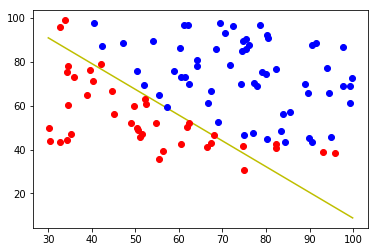

In [44]:
[w0, w1] = logistic_model.state_dict()['linear.weight'].numpy()[0]
b = logistic_model.state_dict()['linear.bias'].numpy()[0]
plot_x = np.arange(30, 100, 0.1)
plot_y = (-w0 * plot_x - b) / w1
plt.plot(plot_x, plot_y, 'y')
plt.plot(plot_x0_0, plot_x0_1, 'ro', label='x_0')
plt.plot(plot_x1_0, plot_x1_1, 'bo', label='x_1')
plt.show()